In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image
from utils import Parser

In [6]:
np.random.seed(42)

In [7]:
%matplotlib inline

In [8]:
BASE_DIR = "dataset/labels"
filenames = os.listdir(BASE_DIR)
print(f"Going to analyze {len(filenames)} images")

Going to analyze 709 images


In [9]:
# initialize data
targets = 0
difficulty = []
placements = []

In [10]:
for i, fn in enumerate(filenames):
    if (i + 1) % 100 == 0:
        print(f"Analyzed {i + 1} images")
    parser = Parser(BASE_DIR, fn)
    metadata = parser.fetch_metadata()
    
    # an image for each level of placement
    if np.any(np.isin(metadata["placement"], "good")):
        good = parser.image_path
    if np.any(np.isin(metadata["placement"], "bad")):
        bad = parser.image_path
    if np.any(np.isin(metadata["placement"], "none")):
        none = parser.image_path
        
    # update data
    targets += len(metadata)
    difficulty.extend(metadata["difficult"])
    placements.extend(metadata["placement"])

Analyzed 100 images
Analyzed 200 images
Analyzed 300 images
Analyzed 400 images
Analyzed 500 images
Analyzed 600 images
Analyzed 700 images


## Visualization

In [11]:
print(f"{targets} people in total")

2127 people in total


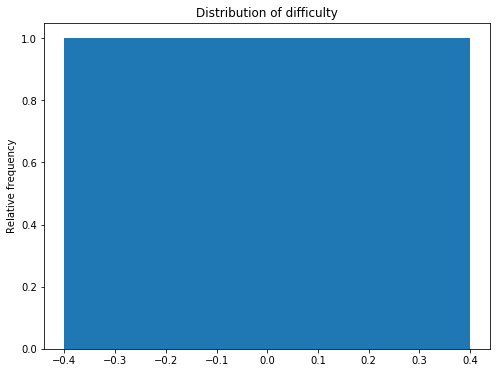

In [12]:
# check out difficulty of images
classes, counts = np.unique(difficulty, return_counts=True)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(1, 1, 1)

ax.bar(classes, counts / sum(counts))
ax.set_ylabel("Relative frequency")
ax.set_title("Distribution of difficulty")

plt.show()

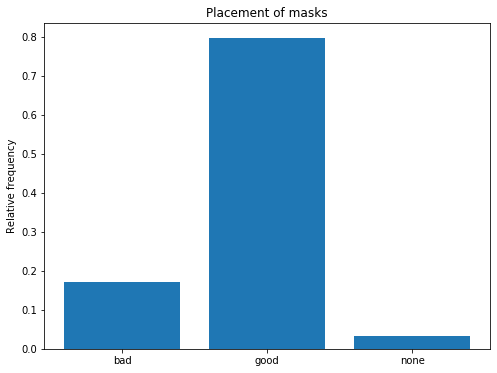

In [13]:
# check out mask placements (how well does the person used the mask)
classes, counts = np.unique(placements, return_counts=True)

fig = plt.figure(figsize=(8, 6))
ax = plt.subplot(1, 1, 1)

ax.bar(classes, counts / sum(counts))
ax.set_ylabel("Relative frequency")
ax.set_title("Placement of masks")

plt.show()

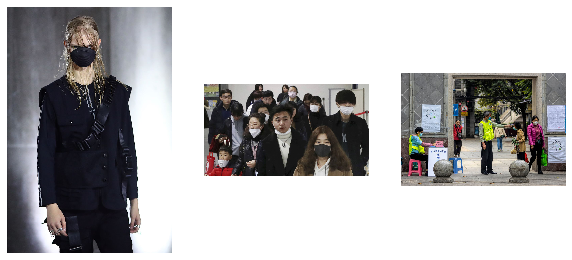

In [17]:
fig, ax = plt.subplots(figsize=(10, 10), ncols=3)

for i, fn in enumerate(zip([""[good, bad, none]):
    ax[i].imshow(np.asarray(Image.open(fn)))
    ax[i].axis("off")

If there is only one level of difficulty in this dataset (which is zero), then it is safe to hypothesise that the MTCNN will perform quite well. As long as the placement of masks don't completely occlude the face, the majority of errors by the detector will be due to bad mask placement. Finally, we should not expect any errors for people that are not wearing masks.